In [29]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

from multi_scale_edge_detection.MultiScaleContourDetector import multi_scale_contour_detection_with_inhibition, multi_scale_contour_detection_without_inhibition


In [30]:

# Read the image
image = cv2.imread('database/images/rino.pgm', cv2.IMREAD_UNCHANGED)

if image is None:
    print("Error: Unable to read the image.")
else:
    # Convert to float
    image = image.astype(float)

    # Normalize the image values to be between 0 and 1
    image_normalized = (image - image.min()) / (image.max() - image.min())

    # Display the normalized image
    # plt.imshow(image_normalized, cmap='gray')
    # plt.title('Normalized Image')
    # plt.show()



In [31]:

# # Read the image
# image = cv2.imread('database/images/aerial/airfield.pgm', cv2.IMREAD_UNCHANGED)

# if image is None:
#     print("Error: Unable to read the image.")
# else:
#     # Convert to float
#     image = image.astype(float)

#     # Normalize the image values to be between 0 and 1
#     image_normalized = (image - image.min()) / (image.max() - image.min())

#     # Calculate the closest even pair of numbers
#     height, width = image.shape[:2]
#     new_height = 2 * int(np.ceil(height / 2))
#     new_width = 2 * int(np.ceil(width / 2))

#     # Resize the image
#     resized_image = cv2.resize(image_normalized, (new_width, new_height))

#     # Display the resized image
#     plt.imshow(resized_image, cmap='gray')
#     plt.title('Resized Image (Closest Pair of Even Numbers)')
#     plt.show()

#     # Print the new dimensions
#     print("Original dimensions:", image.shape[:2])
#     print("Resized dimensions:", resized_image.shape[:2])


In [32]:
## adding noise to the image 

noise = np.random.normal(0, 1, image_normalized.shape)
image_noisy = (1-0.05)*image_normalized + 0.05*noise

# plt.imshow(image_noisy, cmap='gray')
# plt.title('Magnitude du Gradient M_sigma')
# plt.show()

In [33]:
# multi_scale_contour_detection_with_inhibition(image_normalized, N=4, sigma=0.8, alpha=0.001)

In [34]:
# multi_scale_contour_detection_without_inhibition(image_normalized, N=4, sigma=1, alpha=0.01)

# Boucle avec inhibition

In [35]:
def database_loop_with_inhibition(input_path, output_path):

    # Read the image
    image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

    if image is None:
        print("Error: Unable to read the image.")
    else:
        # Convert to float
        image = image.astype(float)

        # Normalize the image values to be between 0 and 1
        image_normalized = (image - image.min()) / (image.max() - image.min())

    
    # adding noise to the image 
    noise = np.random.normal(0, 1, image_normalized.shape)
    image_noisy = (1-0.05)*image_normalized + 0.05*noise

    result_contours = multi_scale_contour_detection_with_inhibition(image_normalized, N=4, sigma=1, alpha=0.001)
    plt.imshow(result_contours, cmap='gray')
    plt.axis('off')
    plt.savefig(output_path)

    
    

In [36]:
# Chemin du dossier contenant les images PGM
input_folder = 'database'

# Chemin du dossier où vous souhaitez stocker les images PNG converties
output_folder = 'output_images_with_inhibition'

original_folder = 'original_images'

# Créer le dossier de sortie s'il n'existe pas déjà
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Parcourir récursivement tous les sous-dossiers et fichiers du dossier d'entrée
for root, dirs, files in os.walk(input_folder):
    for filename in files:
        # Vérifier si le fichier est un fichier PGM
        if filename.endswith('.pgm'):
            # Chemin complet du fichier d'entrée
            input_path = os.path.join(root, filename)
            
            # Chemin relatif du dossier d'entrée par rapport au dossier "database"
            relative_folder = os.path.relpath(root, input_folder)

            
            # Créer le dossier de sortie correspondant s'il n'existe pas déjà
            output_subfolder = os.path.join(output_folder, relative_folder)
            if not os.path.exists(output_subfolder):
                os.makedirs(output_subfolder)
            original_subfolder =  os.path.join(original_folder, relative_folder)
            if not os.path.exists(original_subfolder):
                os.makedirs(original_subfolder)
            
            # Nom du fichier de sortie avec extension PNG
            output_filename = os.path.splitext(filename)[0] + '.png'
            original_filename = os.path.splitext(filename)[0] + '.png'
            
            # Chemin complet du fichier de sortie
            output_path = os.path.join(output_subfolder, output_filename)
            original_path = os.path.join(original_subfolder, original_filename)
            
            # Convertir PGM en PNG

            database_loop_with_inhibition(input_path, output_path)
            original_image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
            plt.imshow(original_image,cmap='gray')
            plt.axis('off')
            plt.savefig(original_path)

print("Conversion terminée.")


# Boucle sans inhibition

In [ ]:
def database_loop_without_inhibition(input_path, output_path):

    # Read the image
    image = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

    if image is None:
        print("Error: Unable to read the image.")
    else:
        # Convert to float
        image = image.astype(float)

        # Normalize the image values to be between 0 and 1
        image_normalized = (image - image.min()) / (image.max() - image.min())

    
    # adding noise to the image 
    noise = np.random.normal(0, 1, image_normalized.shape)
    image_noisy = (1-0.05)*image_normalized + 0.05*noise

    result_contours = multi_scale_contour_detection_without_inhibition(image_normalized, N=4, sigma=1, alpha=0.001)
    plt.imshow(result_contours, cmap='gray')
    plt.axis('off')
    plt.savefig(output_path)


Conversion terminée.


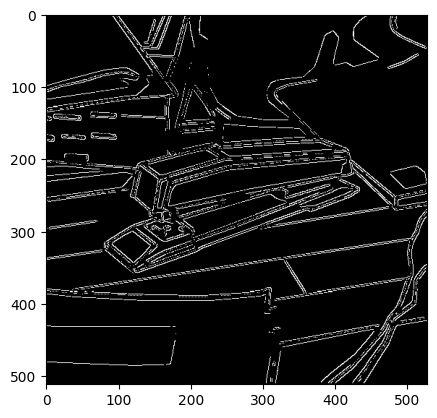

In [ ]:
# Chemin du dossier contenant les images PGM
input_folder = 'database'

# Chemin du dossier où vous souhaitez stocker les images PNG converties
output_folder = 'output_images_without_inhibition'

# Créer le dossier de sortie s'il n'existe pas déjà
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Parcourir récursivement tous les sous-dossiers et fichiers du dossier d'entrée
for root, dirs, files in os.walk(input_folder):
    for filename in files:
        # Vérifier si le fichier est un fichier PGM
        if filename.endswith('.pgm'):
            # Chemin complet du fichier d'entrée
            input_path = os.path.join(root, filename)
            
            # Chemin relatif du dossier d'entrée par rapport au dossier "database"
            relative_folder = os.path.relpath(root, input_folder)
            
            # Créer le dossier de sortie correspondant s'il n'existe pas déjà
            output_subfolder = os.path.join(output_folder, relative_folder)
            if not os.path.exists(output_subfolder):
                os.makedirs(output_subfolder)
            
            # Nom du fichier de sortie avec extension PNG
            output_filename = os.path.splitext(filename)[0] + '.png'
            
            # Chemin complet du fichier de sortie
            output_path = os.path.join(output_subfolder, output_filename)
            
            # Convertir PGM en PNG
            database_loop_without_inhibition(input_path, output_path)

print("Conversion terminée.")

In [ ]:
img_texture = 'image_texture.png'
img_texture_contours = multi_scale_contour_detection_with_inhibition(img_texture, N=4, sigma=1, alpha=0.001)
plt.imshow(img_texture_contours, cmap='gray')
plt.savefig()

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
